In [27]:
import numpy as np
import pandas as pd
import pickle

from gensim.models import word2vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font

In [13]:
font1 = font(fname="C:/Users/USER/Final_Project/font/NotoSansTC-Regular.otf")

In [14]:
model = word2vec.Word2Vec.load('word2vec_new.model')

In [15]:
for item in model.wv.most_similar('mysql'):
    print(item)

('mariadb', 0.6563016772270203)
('postgresql', 0.6041560173034668)
('odbc', 0.5919799208641052)
('scylla', 0.5805774331092834)
('sqlsrv', 0.5703368782997131)
('postgres', 0.564933717250824)
('phpmyadmin', 0.5636835098266602)
('資料庫', 0.5529284477233887)
('php7', 0.5493505597114563)
('pgsql', 0.5461174845695496)


In [16]:
key1 = ['3G', '3ds Max', '3ds Max Design', '6 Sigma', 'A+',
        'ABAQUS', 'ADA', 'ADC', 'ADO', 'ADSL',
        'AIX', 'AJAX', 'ANSI-SQL', 'ARM', 'AS/400',
        'ASIC', 'ASP', 'ASP.NET', 'ATL', 'AWS',
        'Access', 'ActionScript', 'ActiveX', 'Adabas', 'Adobe-Acrobat',
        'Adobe-Animate', 'Adobe-InDesign', 'Adobe-Photoshop', 'Adobe-XD', 'AdvanceLink',
        'After-Effects', 'Alexa', 'Android', 'Angular', 'AngularJS',
        'Apache-SOAP', 'Apple', 'ArcGis', 'ArcView', 'Assembly',
        'Authorware', 'AutoCAD', 'AutoCad-2D', 'AutoCad-3D', 'Avaya',
        'Axure-RP', 'BGP', 'BS7799', 'Baan', 'Banyan',
        'Base', 'BizTalk', 'Blender', 'Bluetooth', 'Bridges',
        'Bugzilla', 'C', 'C#', 'C++', 'C++.Net',
        'C++test', 'CA', 'CADAM', 'CAM', 'CASE',
        'CC-Mail', 'CDMA', 'CGI', 'CICS', 'CIM']
key2 = ['COBOL', 'COM/DCOM', 'CORBA', 'CPLD', 'CSS',
        'CVS', 'Cadence-Allegro', 'Calc', 'Catia', 'Checkpoint',
        'Cinema-4D', 'Circuit-Design', 'Cisco', 'Citrix', 'ClearCase',
        'ClearQuest', 'Clipper', 'CodeTest', 'Cognos', 'Cold-Fusion',
        'CoolDraw', 'CorelDraw', 'D3.js', 'DB2', 'DDK',
        'DEC/VAX', 'DHCP', 'DHTML', 'DNS', 'DOS',
        'DSP', 'DVB數位視頻廣播', 'DVR數位視頻錄像', 'Dart', 'Data-Architect',
        'Data-Guard', 'Data-Marts', 'Data-Modeling', 'DataStage', 'Database-Administrator',
        'Database-Management', 'Dbase', 'Delphi', 'Developer/-Designer-2000', 'DirectX',
        'Django', 'Domino', 'Draw', 'Dreamweaver', 'Drivers',
        'EDA', 'EDI', 'EJB', 'EMC/EMI', 'ERwin',
        'ETL', 'Electronic-Payment', 'Ethernet', 'Excel', 'FORTRAN',
        'FPGA', 'FTP', 'Figma', 'FileNet', 'Firebase',
        'Firewall', 'Fireworks', 'Firmware', 'Flash', 'Flex']
key3 = ['Flutter', 'Focus', 'Fortify', 'Fox-Pro', 'FoxBASE+',
        'FoxPro-2', 'FrameMaker', 'FreeBSD', 'FrontPage', 'GIS',
        'GPRS', 'GPS全球定位系統', 'GSM', 'Games', 'Ghost',
        'Git', 'Github', 'Go', 'Google-Analytics', 'Google-Data-Studio',
        'Google-Display-Network', 'Google-Tag-Manager', 'Google-Trend', 'Graphics', 'HP-Open-View',
        'HP-UX', 'HTML', 'HTTP', 'Hive', 'Hubs',
        'Hubs/-Routers', 'Hyperion-(Brio)', 'IATF16949', 'IDS', 'IE工業工程',
        'IIS', 'IMS', 'IPS', 'ISAPI', 'ISDN',
        'ISO-14000', 'ISO-45001', 'ISO-9000', 'Illustrator', 'Impress',
        'InVision', 'Informatica', 'Informix', 'Ingres', 'Internet-Explorer',
        'Intrusion', 'Inventor', 'J2EE', 'J2ME', 'J2SE',
        'JCL', 'JDBC', 'JMS', 'JSF', 'JSP',
        'Jasmine', 'Java', 'JavaScript', 'Jenkins', 'Juniper',
        'Junit', 'Kotlin', 'LAN', 'LDAP', 'LabVIEW']
key4 = ['LanManager', 'LanServer', 'Lantastic', 'Lease-Lines', 'LibreOffice-Writer',
        'Linux', 'Load-Balancing', 'LoadRunner', 'Lotus-Notes', 'LotusScript',
        'MAYA', 'MCU', 'MES', 'MFC', 'MIDI',
        'MMS', 'MPLS', 'MQSeries', 'MRP', 'MS-SQL',
        'MVS', 'Mac-OS', 'Mac/Macintosh', 'Macromedia-Director', 'Mainframe',
        'Mantis', 'MapGIS', 'Math', 'Matlab', 'MicroStrategy',
        'Microsoft-Dynamics-AX', 'Microsoft-Exchange', 'Microsoft-Photo-Editor', 'Microsoft-SharePoint', 'Microsoft-SmartPhone',
        'Mindnode', 'Mobile-Network', 'Mobile-phone', 'Motion-Builder', 'Multimedia-Builder',
        'MySQL', 'NDS/Novell-Directory-Services', 'Navision', 'NetWare', 'Netbios',
        'Network-Cards', 'Node.js', 'ODBC', 'OLAP', 'OOAD',
        'OOP', 'OS-X', 'OS/2', 'OS/390', 'OS/400',
        'OSPF', 'Objective-C', 'OmniGraffle', 'OneNote', 'OrCAD',
        'Oracle', 'Oracle ERP', 'Oracle Financials', 'Oracle Forms', 'Outlook',
        'P-CAD', 'PABX', 'PADS', 'PBX', 'PCBA']
key5 = ['PC lint', 'PDA Handhelds', 'PHP', 'PL 1', 'PL SQL',
        'PLC', 'PPPoE', 'PSTN', 'PTC Creo Elements Direct', 'Pagemaker',
        'Perl', 'PhotoImpact', 'Planner', 'PostgreSQL', 'Power BI',
        'PowerBuilder', 'PowerPCB', 'PowerPoint', 'Premiere', 'Pro*C',
        'Pro E', 'Progress', 'Project', 'Protel', 'Publisher',
        'Python', 'QAD MFG PRO', 'QTP', 'Quark Express', 'R',
        'RDBMS', 'RF', 'RIP', 'RMI', 'RPG',
        'RTL', 'RTSP', 'Rails', 'Rational-Robot', 'Rational-Test-RealTime',
        'ReactJS', 'ReactNative', 'Redux', 'Revit', 'Rexx',
        'Rhino', 'RoHS', 'Robot', 'Routers', 'Ruby',
        'SAN', 'SAN NAS', 'SAP', 'SAPDB', 'SAS',
        'SDLC', 'SMS', 'SMT', 'SNA', 'SNMP',
        'SOAP', 'SOLIDWORKS Electrical', 'SPC', 'SPICE', 'SPSS',
        'SQR', 'STL', 'SUN OS', 'SWIFT', 'SYSBASE']
key6 = ['Sass', 'Scala', 'Screaming Frog SEO Spider', 'Scribus', 'Security',
        'Servlets', 'Shell', 'Shtml', 'Silverlight', 'Silverstream',
        'SimilarWeb', 'Sketch', 'Sketch up', 'Sniffer', 'Socket',
        'Softimage', 'Solaris', 'SolidWorks', 'Sonet', 'Spring',
        'Squid', 'Struts', 'Sublime', 'Sun Solaris', 'SuperGIS',
        'Sybase', 'Synopsys', 'Systems Administration', 'Systems Analysis', 'Systems Analyst',
        'TCL', 'TCP IP', 'TIBCO', 'TK', 'TS16949',
        'Tableau', 'Tandem', 'TcpDump', 'Telecom', 'Teradata',
        'Test Scripts', 'TestBed', 'Toad', 'Tomcat', 'UDP',
        'UML', 'UNIX', 'USB OTG', 'USB技術', 'Unigraphics',
        'Unity3D', 'Unreal Engine', 'V Ray', 'VBA', 'VBScript',
        'VERITAS', 'VHDL', 'VLAN', 'VM', 'VMS',
        'VPN', 'VSAM', 'Verilog', 'Version Control', 'Visio',
        'Visual Basic', 'Visual Basic.net', 'Visual C#', 'Visual C++', 'Visual Foxpro']
key7 = ['Visual J#', 'Visual SourceSafe', 'Visual Studio', 'Visual Studio .net', 'Vmware',
        'VoIP', 'VueJS', 'VxWorks', 'WAN', 'WAP',
        'WIN-CE', 'WLAN', 'WML', 'WPS', 'Web-Master/Developer',
        'WebAssembly', 'WebLogic', 'WebMethods', 'WebSphere', 'Win32',
        'WinForm', 'Windows 10', 'Windows 2000', 'Windows 2003', 'Windows 7',
        'Windows 8', 'Windows 95', 'Windows 98', 'Windows Mobile', 'Windows NT',
        'Windows Server 2008', 'Windows Server 2012', 'Windows Server 2019', 'Windows Vista', 'Windows XP',
        'Word', 'Wordperfect', 'X++', 'X.25', 'XHTML',
        'XML', 'XML Web services', 'XSL', 'XSLT', 'Xmind',
        'Zbrush', 'Zeplin', 'e commerce', 'hadoop', 'iOS',
        'iptables', 'jQuery', 'ssh', '上華ERP系統', 
        '天心資訊', '德安資訊ERP', '德安飯店餐飲管理系統', '文中系統',
        '正航', '浪潮', '用友U8', 
        '金旭飯店管裡系統', '金蝶', '鉅茂', '鼎基-ERP', '鼎新']
key8 = ['機器學習', '深度學習', '演算法', '監督式', '機率', 
        '人工智慧', '決策樹', '數據分析', '資料探勘', '正規化', 
        '過度配適', '特徵工程', '特徵選區', 'svm', 'random forest', 
        '隨機森林', 'sklearn', '矩陣', '自然語言處理', 'nlp', 
        'tfidf', 'word2vec', 'bert', 'logistic regression', 'linear regression', 
        '迴歸', 'elmo', 'seq2seq', 'rnn', 'cnn', 
        'knn', 'k means', '程式', 'ai', 'pca', 
        '主成分分析', '統計', 'cart', 'maximum likelihood estimation', 'gan', 
        'reinforcement learning', 'sigmoid', '資料庫', 'vscode', 'ubuntu', 
        'Decision Tree', 'ID3', 'Naive Bayes', 'Xgboost', 'NN', 
        'Polynomial Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'DBSCAN', 
        'EM', 'SVD', 'PCA', 'T-SNE']
key9 = ['網頁設計', '專案管理', 'laravel9', 'php', 'android', '資料庫', '梯度下降法', '資安', 'word embedding',
        '前端', '後端', '全端', '工程師', '網路爬蟲', '資工', '叢集']

In [17]:
keyword = []
for lst in [key1, key2, key3, key4, key5, key6, key7, key8, key9]:
    for w in lst:
        w = w.replace('-', ' ')
        w = w.replace('/', ' ')
        w = w.lower()
        keyword.append(w)

In [19]:
keyword

['3g',
 '3ds max',
 '3ds max design',
 '6 sigma',
 'a+',
 'abaqus',
 'ada',
 'adc',
 'ado',
 'adsl',
 'aix',
 'ajax',
 'ansi sql',
 'arm',
 'as 400',
 'asic',
 'asp',
 'asp.net',
 'atl',
 'aws',
 'access',
 'actionscript',
 'activex',
 'adabas',
 'adobe acrobat',
 'adobe animate',
 'adobe indesign',
 'adobe photoshop',
 'adobe xd',
 'advancelink',
 'after effects',
 'alexa',
 'android',
 'angular',
 'angularjs',
 'apache soap',
 'apple',
 'arcgis',
 'arcview',
 'assembly',
 'authorware',
 'autocad',
 'autocad 2d',
 'autocad 3d',
 'avaya',
 'axure rp',
 'bgp',
 'bs7799',
 'baan',
 'banyan',
 'base',
 'biztalk',
 'blender',
 'bluetooth',
 'bridges',
 'bugzilla',
 'c',
 'c#',
 'c++',
 'c++.net',
 'c++test',
 'ca',
 'cadam',
 'cam',
 'case',
 'cc mail',
 'cdma',
 'cgi',
 'cics',
 'cim',
 'cobol',
 'com dcom',
 'corba',
 'cpld',
 'css',
 'cvs',
 'cadence allegro',
 'calc',
 'catia',
 'checkpoint',
 'cinema 4d',
 'circuit design',
 'cisco',
 'citrix',
 'clearcase',
 'clearquest',
 'clipper',

In [21]:
#word2vec + pca

In [22]:
new_keywords = []
word_vectors = []

for kw in keyword:
    try:
        word_vectors.append(np.array(model.wv[kw]))
        new_keywords.append(kw)
    except:
        print(kw, 'not in model')
twodim = PCA().fit_transform(word_vectors)[:,:2]

3ds max not in model
3ds max design not in model
6 sigma not in model
a+ not in model
ansi sql not in model
as 400 not in model
adabas not in model
adobe acrobat not in model
adobe animate not in model
adobe indesign not in model
adobe photoshop not in model
adobe xd not in model
advancelink not in model
after effects not in model
apache soap not in model
arcview not in model
authorware not in model
autocad 2d not in model
autocad 3d not in model
avaya not in model
axure rp not in model
bs7799 not in model
baan not in model
banyan not in model
bridges not in model
c not in model
c++.net not in model
c++test not in model
cadam not in model
cc mail not in model
cdma not in model
cics not in model
com dcom not in model
corba not in model
cadence allegro not in model
catia not in model
cinema 4d not in model
circuit design not in model
clearcase not in model
clearquest not in model
codetest not in model
cold fusion not in model
cooldraw not in model
d3.js not in model
ddk not in model
dec 

In [23]:
len(new_keywords)

314

In [25]:
word_vectors #100維

[array([-1.0006837 ,  2.6934414 , -1.8005754 ,  0.6598477 , -0.42318264,
        -0.80861396, -0.23351163, -0.36974815,  0.5713002 , -0.6693012 ,
        -1.2686363 ,  0.62840307, -0.42933983,  0.47783777,  0.3907007 ,
        -0.90241987, -0.08390991,  1.218189  , -0.76305145, -1.3906395 ,
        -1.1375141 ,  0.41197535,  1.5750142 ,  0.67694336,  1.5105299 ,
        -1.9711301 , -1.8932772 ,  1.7862486 ,  1.0430965 ,  0.47633368,
         0.8621983 , -0.7618955 ,  1.6420665 , -0.9959359 , -0.4091023 ,
         1.1658305 , -1.6717464 ,  0.81189877, -0.46285093,  0.90673065,
        -0.16943428, -0.18888515,  1.3849305 ,  1.5352894 ,  1.0663178 ,
         0.07984726, -1.5923532 ,  0.1960707 ,  0.08255044,  0.66282696,
         1.1785837 ,  0.8343682 , -0.09999138,  0.92986864, -1.4033452 ,
         0.9436334 ,  0.35363713, -1.4689941 , -1.2909355 , -0.2862344 ,
        -0.4748775 ,  0.42641824, -0.2633967 ,  1.929892  , -0.8067366 ,
        -1.2660171 ,  0.244918  ,  1.7457128 , -0.4

In [24]:
twodim #2維

array([[-1.14907243e+00, -3.90589401e+00],
       [-4.27573036e-01, -5.82230017e-01],
       [ 8.47387425e-01, -3.55021148e+00],
       [ 7.06257961e-01, -5.66314005e+00],
       [-1.55143121e+00,  4.72967213e+00],
       [-1.06744417e+00, -3.44580013e+00],
       [-1.31519290e+00, -1.85692043e+00],
       [-5.30105013e+00,  1.01899334e+01],
       [ 6.93137903e-01, -1.64415850e+00],
       [ 2.14859277e+00, -1.34341234e+00],
       [-9.28603047e+00,  7.35452240e+00],
       [-8.61594270e+00,  1.08826114e+01],
       [ 7.24996736e-02, -1.05735250e+00],
       [-2.50984774e+00, -1.79029251e+00],
       [-5.22995567e+00, -5.53545257e+00],
       [-2.24150474e+00,  8.29358782e+00],
       [-2.98500724e+00, -7.48725270e-01],
       [-2.79851179e-01, -3.33666777e+00],
       [-2.71282395e+00, -2.01755236e+00],
       [-4.93207094e-03,  7.09266967e+00],
       [-2.09565687e+00,  3.75205278e+00],
       [ 4.12731511e-02, -1.70349229e+00],
       [-1.08664349e-01,  2.05227978e+00],
       [-2.

In [ ]:
# plt.figure(figsize=(15,15))
# plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='b')
# for word, (x,y) in zip(new_keywords, twodim):
#     plt.text(x+0.05, y+0.05, word, fontproperties=font1)
# plt.show()

In [20]:
# kmeans

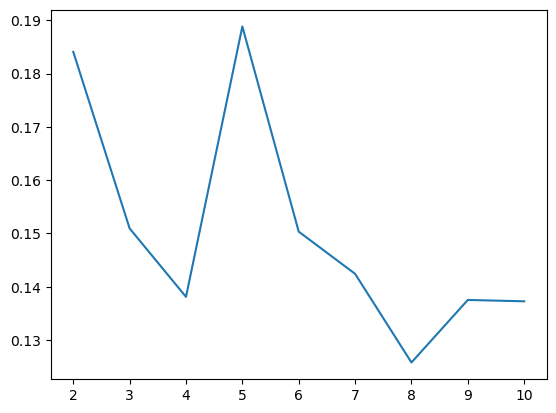

In [28]:
silhouette_avg = []
for i in range(2,11):
    kmeans_fit = KMeans(n_clusters = i).fit(word_vectors)
    silhouette_avg.append(silhouette_score(word_vectors, kmeans_fit.labels_))
plt.plot(range(2,11), silhouette_avg)

In [33]:
# kmeans 5 群

kmeans = KMeans(n_clusters = 5)
kmeans.fit(word_vectors) 
label = kmeans.predict(word_vectors)

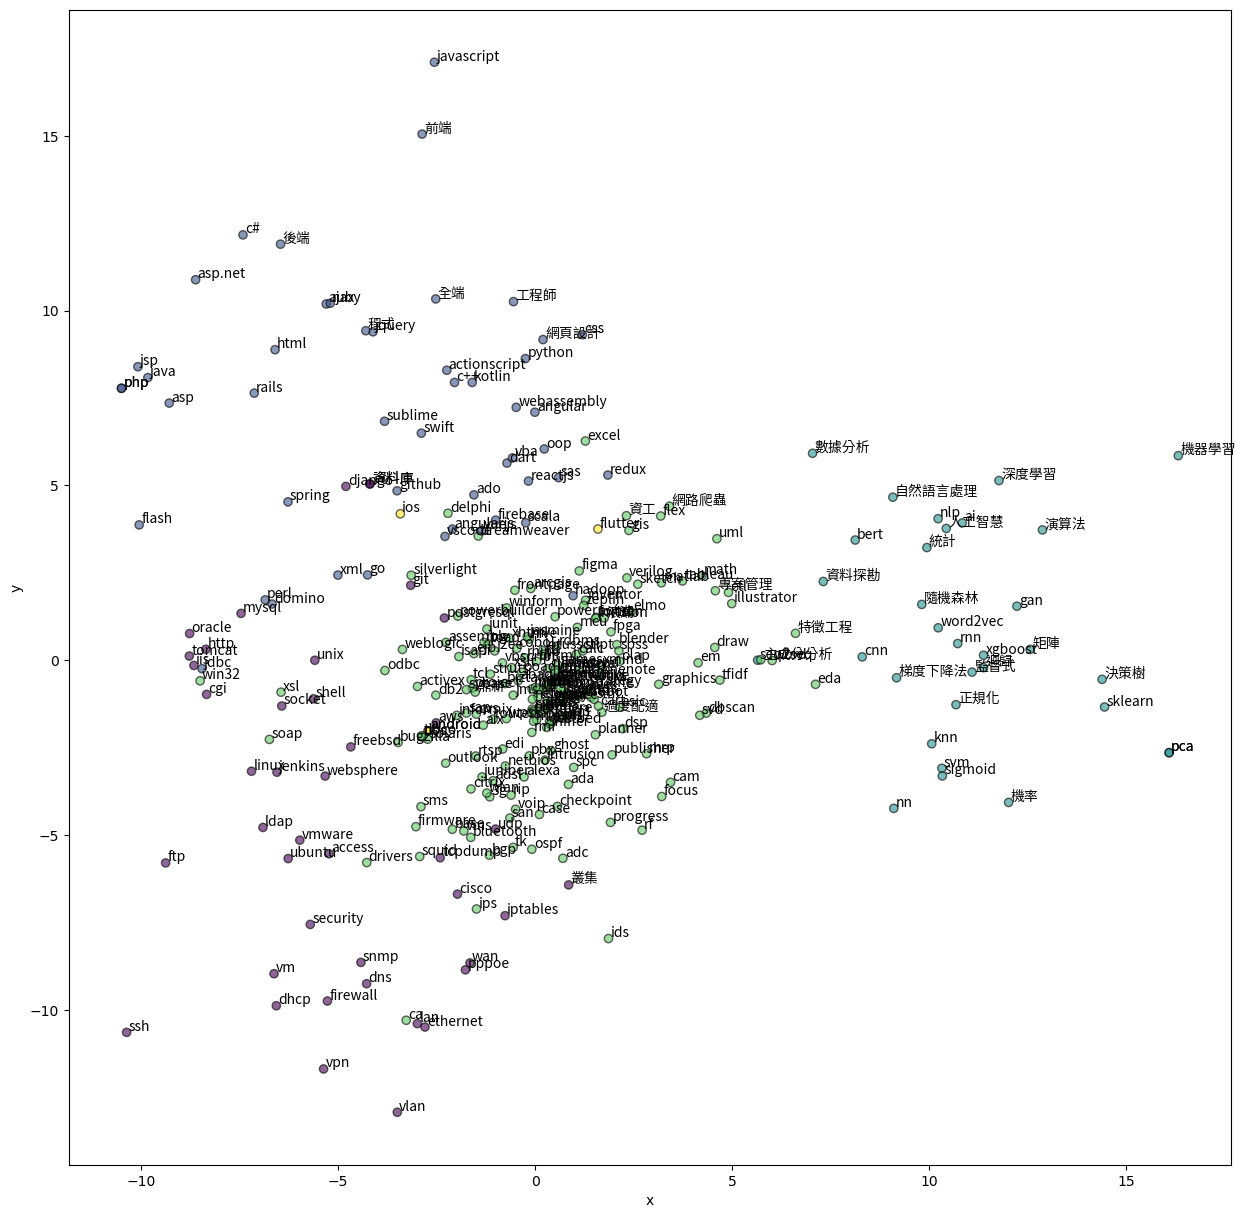

In [41]:
plt.figure(figsize=(15,15))

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(
    twodim[:,0], twodim[:,1], 
    c = label,         # 指定標記
    edgecolor = 'k',   # 無邊框
    alpha = 0.6           # 不透明度
)
for word, (x,y) in zip(new_keywords, twodim):
    plt.text(x+0.05, y+0.05, word, fontproperties=font1)

plt.show() 

In [47]:
key_df = pd.DataFrame(columns = ['key', 'x', 'y', 'cluster'])

In [48]:
for i in range(len(twodim)):
    key_df.loc[i] = [new_keywords[i], twodim[i,0], twodim[i,1], label[i]]

In [49]:
key_df.head()

,key,x,y,cluster
0,3g,-1.149072,-3.905894,3
1,abaqus,-0.427573,-0.582230,3
2,ada,0.847387,-3.550211,3
3,adc,0.706258,-5.663140,3
4,ado,-1.551431,4.729672,1


In [50]:
key_df.to_csv('key_df.csv')